In [1]:
#---An Example Machine Learning Problem---
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits=pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
#fruit_label is the training label
#the name columns won't be used, just to be readible
#color_score is based on a simple scale, prom 0.00(purple) to 1(red)
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{np.int64(1): 'apple',
 np.int64(2): 'mandarin',
 np.int64(3): 'orange',
 np.int64(4): 'lemon'}

In [5]:
#Our goal is to build a classifier from this data that can predict the correct type of fruit for any given observation
#for any features
#Can we tell the differences between two different fruits based on their color?
#Can the classifier predict the type of fruit correctly just from this info?
#We split the original dataset into two parts X_train and y_train to train the classifier and the remaining samples in X_test
#and y_test

#To create these, we use train_test_split
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
#random_state provides a seed to the functions internal random value generator
fruits.shape

(59, 7)

In [7]:
X_train.shape

(44, 4)

In [8]:
X_test.shape

(15, 4)

In [9]:
y_train.shape

(44,)

In [10]:
y_test.shape

(15,)

In [11]:
X_train

,mass,width,height,color_score
42,154,7.2,7.2,0.82
48,174,7.3,10.1,0.72
7,76,5.8,4.0,0.81
14,152,7.6,7.3,0.69
32,164,7.2,7.0,0.80
49,132,5.8,8.7,0.73
29,160,7.0,7.4,0.81
37,154,7.3,7.3,0.79
56,116,5.9,8.1,0.73
18,162,7.5,7.1,0.83


In [12]:
X_test

,mass,width,height,color_score
26,362,9.6,9.2,0.74
35,150,7.1,7.9,0.75
43,194,7.2,10.3,0.70
28,140,6.7,7.1,0.72
11,172,7.1,7.6,0.92
2,176,7.4,7.2,0.60
34,142,7.6,7.8,0.75
46,216,7.3,10.2,0.71
40,154,7.1,7.5,0.78
22,140,7.3,7.1,0.87


In [13]:
y_train

42    3
48    4
7     2
14    1
32    3
49    4
29    3
37    3
56    4
18    1
55    4
27    3
15    1
5     2
31    3
16    1
50    4
20    1
51    4
8     1
13    1
25    3
17    1
58    4
57    4
52    4
38    3
1     1
12    1
45    4
24    3
6     2
23    1
36    3
21    1
19    1
9     1
39    3
54    4
3     2
0     1
53    4
47    4
44    4
Name: fruit_label, dtype: int64

In [14]:
y_test

26    3
35    3
43    4
28    3
11    1
2     1
34    3
46    4
40    3
22    1
4     2
10    1
30    3
41    3
33    3
Name: fruit_label, dtype: int64

In [15]:
#Now that we have a training and test set, we're ready for the next step
#But first, let's look for more details in the data

In [16]:
#---Examining the Data---
#a feature pairplot is the first visulization tool we'll use
from matplotlib import cm
import pandas as pd
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

/var/folders/lf/pg9fbzp90r50m6xth6gg7pw80000gq/T/ipykernel_1415/769746350.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('gnuplot')


<IPython.core.display.Javascript object>

In [17]:
#a three-dimensional feature scatterplot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

<IPython.core.display.Javascript object>

In [18]:
#---K-Nearest Neighbors Classification---
#import required modules and load data file

In [19]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [20]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [21]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{np.int64(1): 'apple',
 np.int64(2): 'mandarin',
 np.int64(3): 'orange',
 np.int64(4): 'lemon'}

In [22]:
#create train-test split
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
#create classifier object
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [24]:
#train the classifier (fit the estimator) using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
#estimate the accuracy of the classifier on future data, using the test data
knn.score(X_test, y_test)

0.5333333333333333

In [26]:
#use the trained k-nn classifier model to classify new, previously unseen objects
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [27]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

In [28]:
#plot the decision boundaries of the k-nn classifier
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

<IPython.core.display.Javascript object>


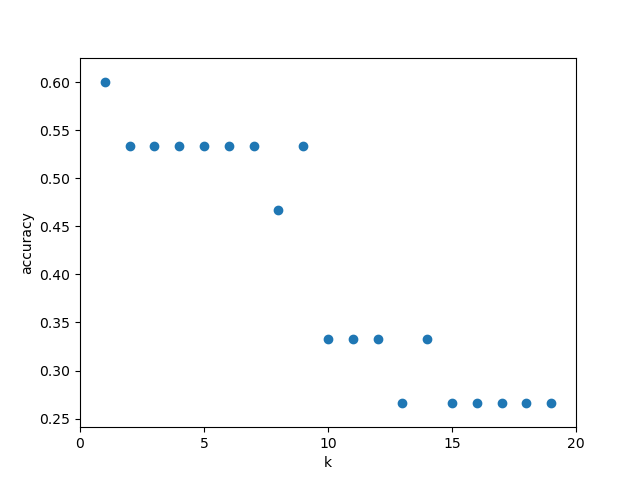

In [ ]:
#How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [ ]:
#An acceptable sequence of operations using scikit-learn to apply the k-nearest neighbors classification method:
#read_table, train_test_split, KNeighborsClassifier, fit, score